**Predicting prices of Airbnb**

**Life cycle of this Machine Learning project**

*  Understanding the Problem Statement
*  Data Collection
*  Performing data checks
*  Exploratory data analysis
*  Data Pre-Processing
*  Model Training
*  Choosing best model

**Problem Statement**

This Machine Learning project aims to predict the price of Airbnb based on inputs such as Location of Airbnb, Number of rooms, Property type, Reviews in the Airbnb platform, etc.

**Data Collection**

* The dataset is sourced from this Website: https://data.beta.nyc/dataset/inside%C2%ADairbnb%C2%ADdata/resource/9d64399b%C2%AD36d6%C2%AD40a9%C2%ADb0bb%C2%ADf26ae0d9c53f
* The dataset contains 27392 rows and 52 columns

Importing the libraries required

In [292]:
#Importing the basic libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

#Importing libraries for preprocessing the data
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

#Importing the evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

#Importing the Regression algorithms
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from catboost import CatBoostRegressor
warnings.filterwarnings('ignore')

In [293]:
#Reading the CSV dataset as a Pandas Dataframe
df = pd.read_csv('listings.csv')

In [294]:
#Checking if there are any duplicate records in the daset
df.duplicated().sum()

0

There are not duplicate records

In [295]:
#Checking the Shape of the dataset
df.shape

(27392, 52)

In [296]:
#Checking the first 5 rows of the dataset
df.head()

,id,scrape_id,last_scraped,name,picture_url,host_id,host_name,host_since,host_picture_url,street,...,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,host_listing_count
0,1069266,2.020000e+13,01-02-2015,Stay like a real New Yorker!,https://a0.muscache.com/pictures/50276484/larg...,5867023,Michael,04-10-2013,https://a2.muscache.com/ic/users/5867023/profi...,"East 53rd Street, New York, NY 10022, United S...",...,4/28/13,12/17/14,86.0,9.0,7.0,9.0,9.0,10.0,9.0,1
1,1846722,2.020000e+13,01-02-2015,Apartment 20 Minutes Times Square,https://a1.muscache.com/pictures/35865039/larg...,2631556,Denise,6/13/12,https://a2.muscache.com/ic/users/2631556/profi...,"West 155th Street, New York, NY, United States",...,01-05-2014,12/29/14,85.0,8.0,8.0,9.0,8.0,7.0,8.0,2
2,2061725,2.020000e+13,01-02-2015,Option of 2 Beds w Private Bathroom,https://a2.muscache.com/pictures/50650147/larg...,4601412,Miao,01-05-2013,https://a0.muscache.com/ic/users/4601412/profi...,"Van Buren Street, Brooklyn, NY 11221, United S...",...,02-04-2014,12/29/14,98.0,10.0,10.0,10.0,10.0,9.0,10.0,4
3,44974,2.020000e+13,01-03-2015,Charming Bright West Village Studio,https://a1.muscache.com/pictures/20489905/larg...,198425,Sara,08-11-2010,https://a0.muscache.com/ic/users/198425/profil...,"Greenwich Ave, New York, NY 10011, United States",...,10-08-2010,10/30/14,96.0,10.0,9.0,10.0,10.0,10.0,9.0,1
4,4701675,2.020000e+13,01-02-2015,Charming Apartment in Chelsea,https://a2.muscache.com/pictures/60588955/larg...,22590025,Charles,10/15/14,https://a2.muscache.com/ic/users/22590025/prof...,"West 22nd Street, New York, NY 10011, United S...",...,12-08-2014,12-08-2014,100.0,10.0,10.0,10.0,10.0,10.0,10.0,1


We can drop some of the features straight away because they do not contribute to the price of an Airbnb. Those features are:

* id
* scrape_id
* last_scraped
* name
* picture_url
* host_id
* host_name
* host_since
* host_picture_url
* calendar_updated


Some features have the same value for all records hence they can also be dropped. Those features are:
* market
* country

Some features carry the same information that the Latitude and Longitude hold. Hence they can also be dropped. Those features are:
* neighbourhood
* street
* neighbourhood_cleansed
* city
* state
* zipcode

In [297]:
#Checking the number of missing values in each column
df.isna().sum()

id                                 0
scrape_id                          0
last_scraped                       0
name                               0
picture_url                        0
host_id                            0
host_name                          0
host_since                         0
host_picture_url                   0
street                             0
neighbourhood                   2027
neighbourhood_cleansed             0
city                               0
state                              2
zipcode                          162
market                             0
country                            1
latitude                           0
longitude                          0
is_location_exact                  0
property_type                      6
room_type                          0
accommodates                       0
bathrooms                        463
bedrooms                         140
beds                              98
bed_type                           0
s

The below features have missing values for a large number of records. Hence they cannot be imputed. Thus dropping those features completely. Those features are:
* square_feet
* weekly_price
* monthly_price

In [298]:
#Listing the columns that are to be dropped completely
columns_to_drop = ['id','scrape_id','last_scraped','name','picture_url','host_id','host_name','host_since','host_picture_url','neighbourhood','market','country','street','neighbourhood_cleansed','city','state','zipcode','square_feet','weekly_price','monthly_price','calendar_updated']

In [299]:
#Dropping the columns that do not contribute to the price of an Airbnb
df=df.drop(columns=columns_to_drop)

In [300]:
#Checking the Shape of the dataset after dropping the irrelavant features
df.shape

(27392, 31)

In [301]:
#Checking the number of unique values in each column
df.nunique()

latitude                       27373
longitude                      27357
is_location_exact                  2
property_type                     18
room_type                          3
accommodates                      16
bathrooms                         15
bedrooms                          11
beds                              15
bed_type                           5
price                            452
guests_included                   15
extra_people                     107
minimum_nights                    28
maximum_nights                   189
availability_30                   31
availability_60                   61
availability_90                   91
availability_365                 366
calendar_last_scraped              3
number_of_reviews                171
first_review                    1613
last_review                      741
review_scores_rating              56
review_scores_accuracy             9
review_scores_cleanliness          9
review_scores_checkin              8
r

In [302]:
#Checking the number of missing values in each column
df.isna().sum()

latitude                          0
longitude                         0
is_location_exact                 0
property_type                     6
room_type                         0
accommodates                      0
bathrooms                       463
bedrooms                        140
beds                             98
bed_type                          0
price                             0
guests_included                   0
extra_people                      0
minimum_nights                    0
maximum_nights                    0
availability_30                   0
availability_60                   0
availability_90                   0
availability_365                  0
calendar_last_scraped             0
number_of_reviews                 0
first_review                   8364
last_review                    8364
review_scores_rating           8657
review_scores_accuracy         8727
review_scores_cleanliness      8731
review_scores_checkin          8729
review_scores_communication 

Since we have sufficient amount of data we can drop the records where some of the values are missing

In [303]:
#Dropping the records with missing values
columns_to_drop_na = ['review_scores_rating',
'review_scores_accuracy',
'review_scores_cleanliness',
'review_scores_checkin',
'review_scores_communication',
'review_scores_location',
'review_scores_value','bathrooms','bedrooms','beds','property_type']
df = df.dropna(subset=columns_to_drop_na)

In [304]:
#Checking the number of missing values after dropping the nan values
df.isna().sum()

latitude                       0
longitude                      0
is_location_exact              0
property_type                  0
room_type                      0
accommodates                   0
bathrooms                      0
bedrooms                       0
beds                           0
bed_type                       0
price                          0
guests_included                0
extra_people                   0
minimum_nights                 0
maximum_nights                 0
availability_30                0
availability_60                0
availability_90                0
availability_365               0
calendar_last_scraped          0
number_of_reviews              0
first_review                   0
last_review                    0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
host_listi

None of the columns have missing values now

In [305]:
#Checking the shape of the dataframe after dropping the records with missing values
df.shape

(18131, 31)

We still have sufficient amount of records even after dropping the records with missing values

In [306]:
#Converting the columns with dates to a standard format
date_columns = ['calendar_last_scraped', 'first_review','last_review']
df[date_columns] = df[date_columns].apply(pd.to_datetime)

In [307]:
#Defining a list of numerical columns which will be used for scaling
numeric_columns = ['latitude',
'longitude',
'accommodates',
'bathrooms',
'bedrooms',
'beds',
'guests_included',
'extra_people',
'minimum_nights',
'maximum_nights',
'availability_30',
'availability_60',
'availability_90',
'availability_365',
'number_of_reviews',
'review_scores_rating',
'review_scores_accuracy',
'review_scores_cleanliness',
'review_scores_checkin',
'review_scores_communication',
'review_scores_location',
'review_scores_value',
'host_listing_count',
'host_listing_count']

In [308]:
#Defining a list of categorical columns which will be used for encoding
categorical_columns = ['is_location_exact',
'property_type',
'room_type',
'bed_type']

In [309]:
#Removing the $ symbol from the columns having price
df['price'] = pd.to_numeric(df['price'].str.replace('[\$,]', '', regex=True))
df['extra_people'] = pd.to_numeric(df['extra_people'].str.replace('[\$,]', '', regex=True))

<Axes: >

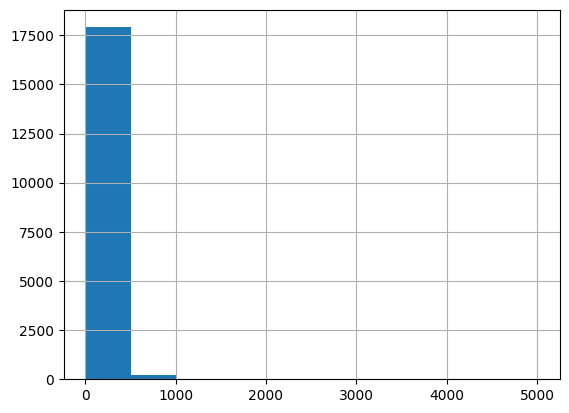

In [310]:
#Plotting a histogram of the price 
df.price.hist()

The price column is skewed towards one side. We can apply log to bring it to a normal distribution

In [311]:
#Applying log to the price
df['price'] = np.log(df['price'].values)

<Axes: >

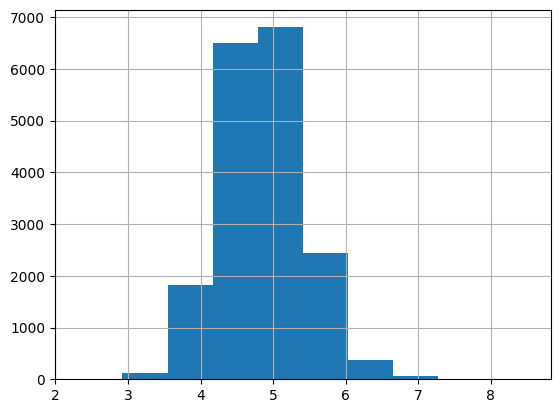

In [312]:
#Plotting a histogram of the price after log
df.price.hist()

The price is now normally distributed after applying log

In [313]:
# Use describe() to get basic statistics for numerical variables
numeric_stats = df.describe()

# Display the statistics
print(numeric_stats)

           latitude     longitude  accommodates     bathrooms      bedrooms  \
count  18131.000000  18131.000000  18131.000000  18131.000000  18131.000000   
mean      40.733163    -73.964583      2.959076      1.106254      1.126138   
min       40.509611    -74.239539      1.000000      0.000000      0.000000   
25%       40.701197    -73.988203      2.000000      1.000000      1.000000   
50%       40.727444    -73.966064      2.000000      1.000000      1.000000   
75%       40.763873    -73.947615      4.000000      1.000000      1.000000   
max       40.907704    -73.726710     16.000000      8.000000     10.000000   
std        0.047841      0.033707      1.760786      0.352013      0.640279   

               beds         price  guests_included  extra_people  \
count  18131.000000  18131.000000     18131.000000  18131.000000   
mean       1.558767      4.852603         1.549004     16.092438   
min        1.000000      2.302585         0.000000      0.000000   
25%        1.000

In [314]:
#Displaying the correlation between the features
df_corr = df[numeric_columns].corr()
df_corr

,latitude,longitude,accommodates,bathrooms,bedrooms,beds,guests_included,extra_people,minimum_nights,maximum_nights,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,host_listing_count,host_listing_count
latitude,1.000000,0.124191,-0.042876,-0.059469,-0.079481,-0.052555,-0.034220,0.020426,-0.003853,-0.030565,...,0.019387,-0.006086,-0.002179,-0.011100,-0.019481,-0.010299,0.050253,0.000018,-0.066112,-0.066112
longitude,0.124191,1.000000,0.021650,0.014902,0.029776,0.052778,-0.004897,-0.028556,-0.028364,-0.043048,...,-0.007026,-0.042598,-0.015892,0.005128,-0.011880,-0.035328,-0.327633,-0.007225,0.099003,0.099003
accommodates,-0.042876,0.021650,1.000000,0.350425,0.596076,0.801752,0.510144,0.157733,-0.029250,-0.001410,...,0.040009,-0.081715,-0.072593,-0.030192,-0.066782,-0.071755,-0.091852,-0.073239,0.213657,0.213657
bathrooms,-0.059469,0.014902,0.350425,1.000000,0.388741,0.381123,0.199837,0.074319,-0.002072,-0.003712,...,-0.037834,-0.001572,-0.022147,-0.009522,-0.017317,-0.027505,-0.029303,-0.005609,0.150317,0.150317
bedrooms,-0.079481,0.029776,0.596076,0.388741,1.000000,0.533984,0.433811,0.113424,0.024362,0.004791,...,0.018041,-0.028447,-0.040657,-0.005927,-0.021091,-0.041661,-0.060786,-0.020807,0.050063,0.050063
beds,-0.052555,0.052778,0.801752,0.381123,0.533984,1.000000,0.386501,0.127723,-0.012014,0.004087,...,0.015229,-0.100268,-0.102884,-0.056909,-0.066573,-0.076317,-0.103827,-0.078698,0.315754,0.315754
guests_included,-0.034220,-0.004897,0.510144,0.199837,0.433811,0.386501,1.000000,0.349702,0.019331,0.000232,...,0.069855,-0.017227,-0.008570,0.018482,-0.008917,-0.009575,-0.041992,-0.027918,0.044271,0.044271
extra_people,0.020426,-0.028556,0.157733,0.074319,0.113424,0.127723,0.349702,1.000000,-0.022573,0.000782,...,0.065600,-0.001504,-0.020353,0.019856,0.003402,0.005481,0.016107,-0.029953,0.044559,0.044559
minimum_nights,-0.003853,-0.028364,-0.029250,-0.002072,0.024362,-0.012014,0.019331,-0.022573,1.000000,-0.003847,...,-0.062435,0.030897,0.018044,0.008497,0.003227,0.006152,0.023540,0.014417,-0.036899,-0.036899
maximum_nights,-0.030565,-0.043048,-0.001410,-0.003712,0.004791,0.004087,0.000232,0.000782,-0.003847,1.000000,...,-0.003907,-0.009598,-0.007692,-0.008769,0.000244,0.002548,-0.007945,-0.001768,0.009141,0.009141


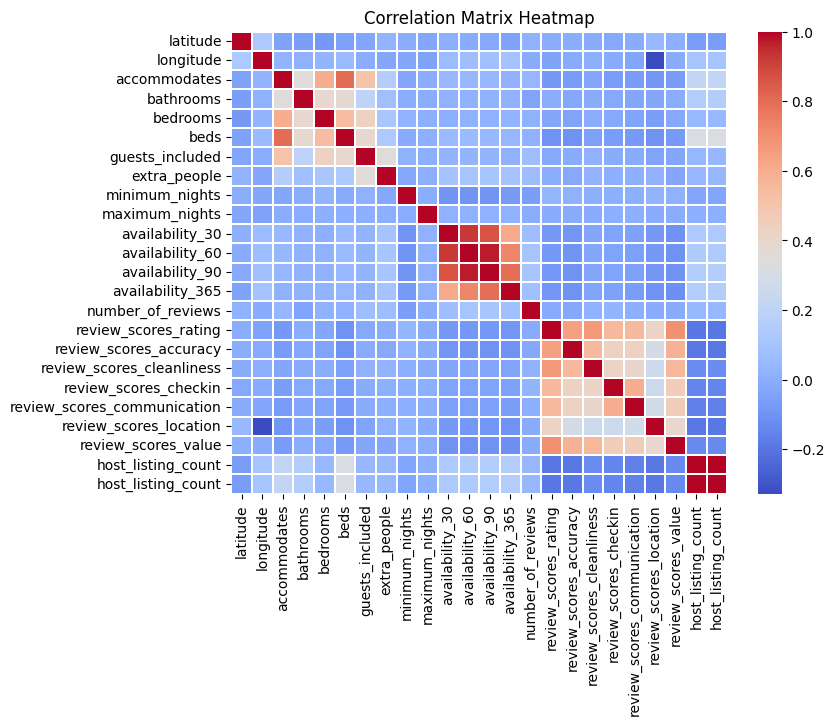

In [315]:
# Create a heatmap using Seaborn to show correlation
plt.figure(figsize=(8, 6))
sns.heatmap(df_corr, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.1)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [316]:
#Splitting the Features and the Predictor into separate dataframes
X = df.drop('price', axis=1)
y = df['price']

In [317]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 40)
print("The shape of X_train is      ", X_train.shape)
print("The shape of X_test is       ",X_test.shape)
print("The shape of y_train is      ",y_train.shape)
print("The shape of y_test is       ",y_test.shape)

The shape of X_train is       (14504, 30)
The shape of X_test is        (3627, 30)
The shape of y_train is       (14504,)
The shape of y_test is        (3627,)


**Data Preprocessing and Model training**

In [318]:
# Create transformers for scaling and one-hot encoding
numeric_transformer = Pipeline(steps=[
    ('scaler', RobustScaler())  # Use RobustScaler for scaling numeric features
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse=False, drop='first',handle_unknown='ignore'))  # Use OneHotEncoder for one-hot encoding categorical features
])

# Create a column transformer to apply transformers to respective columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

# Create a pipeline for preprocessing
preprocessing_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
])

# Fit and transform the training data
X_train_transformed = preprocessing_pipeline.fit_transform(X_train)

# Apply the same preprocessing to the testing set
X_test_transformed = preprocessing_pipeline.transform(X_test)

In [319]:
# Create a linear regression model
linear_regression_model = LinearRegression()

# Fit the model on the transformed training data
linear_regression_model.fit(X_train_transformed, y_train)

# Predict on the transformed testing set
y_pred = linear_regression_model.predict(X_test_transformed)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
explained_variance = explained_variance_score(y_test, y_pred)
# Calculate adjusted R-squared
n = X_test_transformed.shape[0]  # Number of samples
p = X_test_transformed.shape[1]  # Number of features
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
print(f'Linear Regression:')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')
print(f'Explained Variance Score: {explained_variance}')
print(f'Adjusted R-squared: {adjusted_r2}')

Linear Regression:
Mean Squared Error (MSE): 0.11174652179788255
Mean Absolute Error (MAE): 0.2512530108891633
R-squared (R2): 0.6811188706520999
Explained Variance Score: 0.6811346170229395
Adjusted R-squared: 0.6772018495210816


In [320]:
# Create a Lasso regression model
lasso_model = Lasso(alpha=1.0)  # You can adjust the alpha parameter for regularization

# Fit the model on the transformed training data
lasso_model.fit(X_train_transformed, y_train)

# Predict on the transformed testing set
y_pred = lasso_model.predict(X_test_transformed)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
explained_variance = explained_variance_score(y_test, y_pred)
# Calculate adjusted R-squared
n = X_test_transformed.shape[0]  # Number of samples
p = X_test_transformed.shape[1]  # Number of features
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
print(f'Lasso Regression:')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')
print(f'Explained Variance Score: {explained_variance}')
print(f'Adjusted R-squared: {adjusted_r2}')

Lasso Regression:
Mean Squared Error (MSE): 0.3502836935376617
Mean Absolute Error (MAE): 0.469208015560367
R-squared (R2): 0.00042651896159628944
Explained Variance Score: 0.0008780909383951929
Adjusted R-squared: -0.011851882257189361


In [321]:
# Create a Ridge regression model
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha parameter for regularization

# Fit the model on the transformed training data
ridge_model.fit(X_train_transformed, y_train)

# Predict on the transformed testing set
y_pred = ridge_model.predict(X_test_transformed)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
explained_variance = explained_variance_score(y_test, y_pred)
# Calculate adjusted R-squared
n = X_test_transformed.shape[0]  # Number of samples
p = X_test_transformed.shape[1]  # Number of features
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
print(f'Ridge Regression:')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')
print(f'Explained Variance Score: {explained_variance}')
print(f'Adjusted R-squared: {adjusted_r2}')

Ridge Regression:
Mean Squared Error (MSE): 0.11173424191214086
Mean Absolute Error (MAE): 0.25127792373046737
R-squared (R2): 0.681153912671937
Explained Variance Score: 0.6811701348296554
Adjusted R-squared: 0.6772373219844902


In [322]:
# Create a Gradient Boosting regression model
gradient_boost_model = GradientBoostingRegressor(
    n_estimators=100,  # Number of boosting stages
    learning_rate=0.1,  # Step size shrinkage to prevent overfitting
    max_depth=3,       # Maximum depth of the individual trees
    random_state=42    # For reproducibility
)

# Fit the model on the transformed training data
gradient_boost_model.fit(X_train_transformed, y_train)

# Predict on the transformed testing set
y_pred = gradient_boost_model.predict(X_test_transformed)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
explained_variance = explained_variance_score(y_test, y_pred)
# Calculate adjusted R-squared
n = X_test_transformed.shape[0]  # Number of samples
p = X_test_transformed.shape[1]  # Number of features
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
print(f'Gradient Boost:')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')
print(f'Explained Variance Score: {explained_variance}')
print(f'Adjusted R-squared: {adjusted_r2}')

Gradient Boost:
Mean Squared Error (MSE): 0.08413546711256815
Mean Absolute Error (MAE): 0.21721982773783421
R-squared (R2): 0.7599100863327521
Explained Variance Score: 0.759936929463035
Adjusted R-squared: 0.7569609081637518


In [323]:
# Create an AdaBoost regression model
adaboost_model = AdaBoostRegressor(
    base_estimator=None,  # You can specify a base estimator (e.g., DecisionTreeRegressor)
    n_estimators=50,      # Number of boosting stages
    learning_rate=1.0,    # Step size shrinkage to prevent overfitting
    random_state=42       # For reproducibility
)

# Fit the model on the transformed training data
adaboost_model.fit(X_train_transformed, y_train)

# Predict on the transformed testing set
y_pred = adaboost_model.predict(X_test_transformed)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
explained_variance = explained_variance_score(y_test, y_pred)
# Calculate adjusted R-squared
n = X_test_transformed.shape[0]  # Number of samples
p = X_test_transformed.shape[1]  # Number of features
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
print(f'AdaBoost:')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')
print(f'Explained Variance Score: {explained_variance}')
print(f'Adjusted R-squared: {adjusted_r2}')

AdaBoost:
Mean Squared Error (MSE): 0.13553317973733306
Mean Absolute Error (MAE): 0.28625146515443356
R-squared (R2): 0.6132409964676713
Explained Variance Score: 0.6462800093883074
Adjusted R-squared: 0.6084901879374025


In [324]:
# Create a CatBoost regression model
catboost_model = CatBoostRegressor(
    iterations=100,   # Number of boosting stages
    learning_rate=0.1, # Step size shrinkage to prevent overfitting
    depth=6,          # Depth of the trees
    random_seed=42     # For reproducibility
)

# Fit the model on the transformed training data
catboost_model.fit(X_train_transformed, y_train)

# Predict on the transformed testing set
y_pred = catboost_model.predict(X_test_transformed)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
explained_variance = explained_variance_score(y_test, y_pred)
# Calculate adjusted R-squared
n = X_test_transformed.shape[0]  # Number of samples
p = X_test_transformed.shape[1]  # Number of features
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
print(f'CatBoost:')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')
print(f'Explained Variance Score: {explained_variance}')
print(f'Adjusted R-squared: {adjusted_r2}')

0:	learn: 0.5427225	total: 8.05ms	remaining: 797ms
1:	learn: 0.5115038	total: 13.6ms	remaining: 668ms
2:	learn: 0.4842506	total: 19.5ms	remaining: 631ms
3:	learn: 0.4604461	total: 26ms	remaining: 624ms
4:	learn: 0.4403494	total: 31.7ms	remaining: 603ms
5:	learn: 0.4226792	total: 38.6ms	remaining: 605ms
6:	learn: 0.4069491	total: 44.6ms	remaining: 592ms
7:	learn: 0.3933622	total: 49.7ms	remaining: 572ms
8:	learn: 0.3811520	total: 56ms	remaining: 566ms
9:	learn: 0.3712322	total: 61.3ms	remaining: 552ms
10:	learn: 0.3627030	total: 67.2ms	remaining: 544ms
11:	learn: 0.3550375	total: 73.5ms	remaining: 539ms
12:	learn: 0.3482123	total: 78.6ms	remaining: 526ms
13:	learn: 0.3425490	total: 84.3ms	remaining: 518ms
14:	learn: 0.3374874	total: 90.3ms	remaining: 512ms
15:	learn: 0.3326472	total: 95.8ms	remaining: 503ms
16:	learn: 0.3284805	total: 102ms	remaining: 498ms
17:	learn: 0.3250436	total: 107ms	remaining: 489ms
18:	learn: 0.3215335	total: 113ms	remaining: 480ms
19:	learn: 0.3185919	total: 1

CatBoost has given the best perfromance out of all the algorithms tried with the folowing scores

*  Mean Squared Error (MSE): 0.08002231160223632
*  Mean Absolute Error (MAE): 0.21119312728215425
*  R-squared (R2): 0.7716474330815886
*  Explained Variance Score: 0.7716528911003149
*  Adjusted R-squared: 0.7688424322595868